In [57]:
import cifar10
import matplotlib.pyplot as plt

In [58]:
cifar10.data_path = "data/CIFAR-10/"

In [59]:
cifar10.maybe_download_and_extract()

Data has apparently already been downloaded and unpacked.


In [60]:
images_train, cls_train, labels_train = cifar10.load_training_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5


In [61]:
images_test, cls_test, labels_test = cifar10.load_test_data()

Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [62]:
images_test.shape
input_shape = (32,32,3)

In [63]:
cls_train

array([6, 9, 9, ..., 9, 1, 1])

In [64]:
import tensorflow as tf

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [66]:
num_classes = len(set(cls_train))

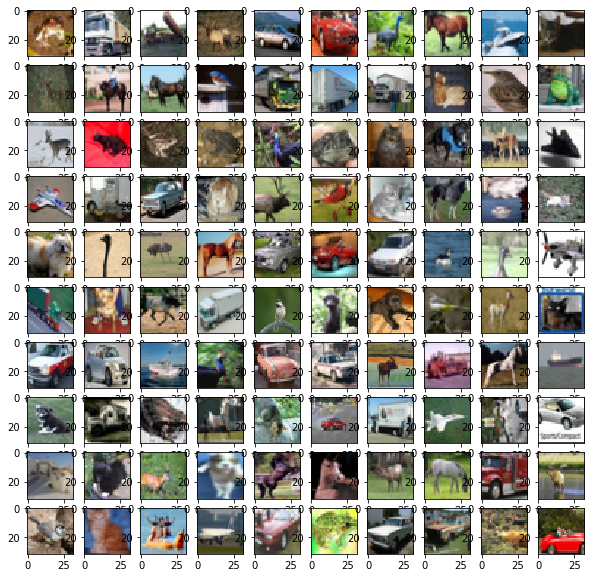

In [67]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
for i in range(100):
    ax = fig.add_subplot(10,10,i+1)
    ax.imshow(images_train[i],cmap = plt.cm.bone)

In [68]:
model = Sequential()
from sklearn.preprocessing import StandardScaler

In [69]:
images_train = images_train.reshape([50000,3072])
images_test = images_test.reshape([10000,3072])

In [70]:
sc = StandardScaler()
images_train = sc.fit_transform(images_train)
images_test = sc.transform(images_test)

In [71]:
images_train = images_train.reshape([50000,32,32,3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

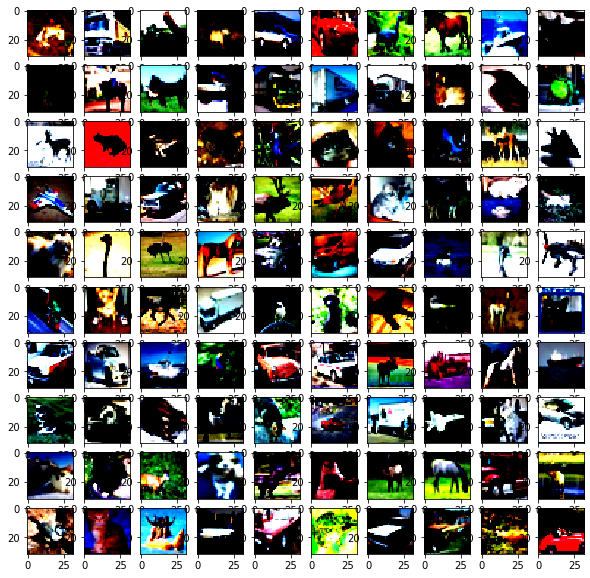

In [72]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))
for i in range(100):
    ax = fig.add_subplot(10,10,i+1)
    ax.imshow(images_train[i],cmap = plt.cm.bone)

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [36]:
model = Sequential(
    [
        tf.keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(units=100,activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(units=100,activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(num_classes,activation='softmax'),
    ]
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1152)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)              

In [37]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(images_train,labels_train,epochs=20,batch_size=100,validation_split=0.1)

Epoch 1/20
450/450 [==============================] - 59s 128ms/step - loss: 1.7305 - accuracy: 0.3640 - val_loss: 1.3351 - val_accuracy: 0.5268
Epoch 2/20
450/450 [==============================] - 58s 128ms/step - loss: 1.3655 - accuracy: 0.5115 - val_loss: 1.1753 - val_accuracy: 0.5836
Epoch 3/20
450/450 [==============================] - 57s 127ms/step - loss: 1.2149 - accuracy: 0.5731 - val_loss: 1.0123 - val_accuracy: 0.6560
Epoch 4/20
450/450 [==============================] - 57s 127ms/step - loss: 1.1228 - accuracy: 0.6100 - val_loss: 0.9915 - val_accuracy: 0.6600
Epoch 5/20
450/450 [==============================] - 57s 128ms/step - loss: 1.0629 - accuracy: 0.6320 - val_loss: 0.9431 - val_accuracy: 0.6830
Epoch 6/20
450/450 [==============================] - 57s 128ms/step - loss: 1.0077 - accuracy: 0.6514 - val_loss: 0.8997 - val_accuracy: 0.6888
Epoch 7/20
450/450 [==============================] - 57s 126ms/step - loss: 0.9717 - accuracy: 0.6630 - val_loss: 0.8853 - val_ac

In [39]:
class_names = cifar10.load_class_names()
class_label = {}
for i in range(0,len(class_names)):
    class_label[i] = class_names[i]
               

Loading data: data/CIFAR-10/cifar-10-batches-py/batches.meta


In [53]:
class_label

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [41]:
images_test = images_test.reshape([10000,32,32,3])
model.evaluate(images_test,labels_test)

313/313 [==============================] - 6s 17ms/step - loss: 0.7779 - accuracy: 0.7358


[0.7778602838516235, 0.73580002784729]

In [42]:
y_pred = model.predict(images_test)

In [48]:
np.argmax(y_pred[0])

3

In [49]:
y_pred_label = []
import numpy as np
for i in range(len(y_pred)):
    y_pred_label.append(np.argmax(y_pred[i]))

In [74]:
y_pred_name = []
for i in y_pred_label:
    y_pred_name.append(class_label[i])

In [86]:
y_pred_tr = []
for i in cls_test:
    y_pred_tr.append(class_label[i])

In [88]:
print(classification_report(y_pred_name,y_pred_tr))

              precision    recall  f1-score   support

    airplane       0.80      0.76      0.78      1059
  automobile       0.84      0.85      0.85       996
        bird       0.55      0.71      0.62       776
         cat       0.54      0.55      0.54       987
        deer       0.72      0.70      0.71      1037
         dog       0.63      0.62      0.63      1015
        frog       0.79      0.84      0.82       941
       horse       0.82      0.69      0.75      1195
        ship       0.82      0.86      0.84       947
       truck       0.83      0.79      0.81      1047

    accuracy                           0.74     10000
   macro avg       0.74      0.74      0.73     10000
weighted avg       0.74      0.74      0.74     10000

